#Liberaries#

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import NotFittedError
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
import missingno as msng
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut,GroupKFold,StratifiedGroupKFold,GroupShuffleSplit,TimeSeriesSplit

#LOAD_DATA_COPY#

In [2]:
df=pd.read_csv("/content/drug200.csv")
new_df=df.copy()
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#PLT BETWEEN FEATURES & OUTPUT#

In [3]:
# sns.pairplot(new_df)

#EDA#

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
new_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
new_df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#PLT_COUNT_COLUMN#

<Axes: xlabel='Drug', ylabel='Count'>

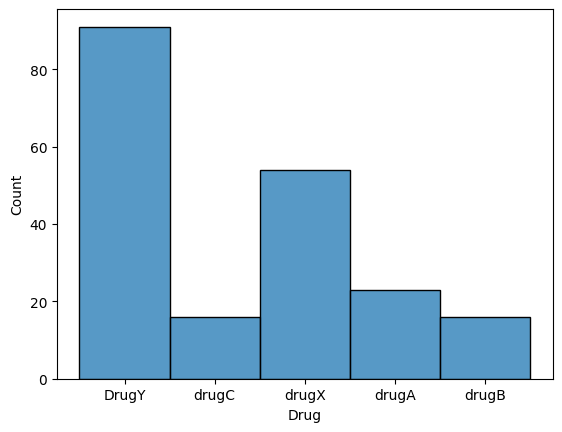

In [7]:
sns.histplot(x='Drug',data=new_df)

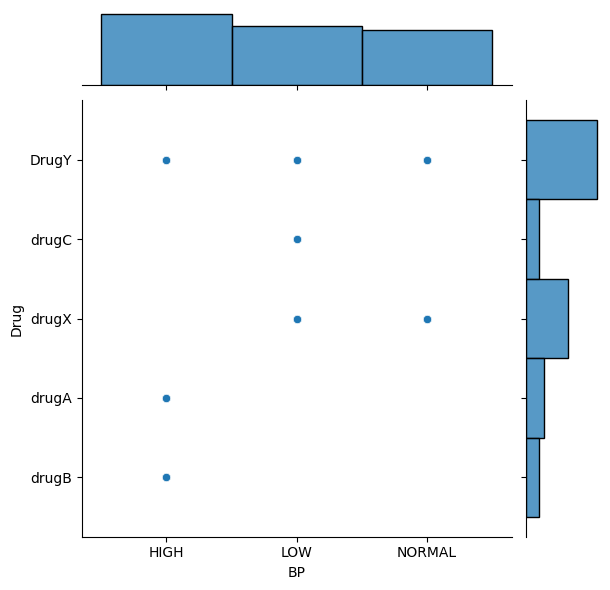

In [8]:
sns.jointplot(x='BP',y='Drug',data=df,kind='scatter')

#ENCODING

In [9]:
new_df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
oe = OrdinalEncoder(categories=[['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']])
new_df['Drug'] = oe.fit_transform(new_df[['Drug']])

In [11]:
new_df['Drug'].unique()

array([0., 1., 2., 3., 4.])

In [12]:
new_df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [13]:
oe = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
new_df['BP'] = oe.fit_transform(new_df[['BP']])

In [14]:
new_df['BP'].unique()

array([2., 0., 1.])

In [15]:
new_df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [16]:
oe = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
new_df['Cholesterol'] = oe.fit_transform(new_df[['Cholesterol']])

In [17]:
new_df['Cholesterol'].unique()

array([1., 0.])

In [18]:
new_df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [19]:
oe = OrdinalEncoder(categories=[['F', 'M']])
new_df['Sex'] = oe.fit_transform(new_df[['Sex']])

In [20]:
new_df['Sex'].unique()

array([0., 1.])

In [21]:
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,2.0,1.0,25.355,0.0
1,47,1.0,0.0,1.0,13.093,1.0
2,47,1.0,0.0,1.0,10.114,1.0
3,28,0.0,1.0,1.0,7.798,2.0
4,61,0.0,0.0,1.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,0.0,1.0,11.567,1.0
196,16,1.0,0.0,1.0,12.006,1.0
197,52,1.0,1.0,1.0,9.894,2.0
198,23,1.0,1.0,0.0,14.020,2.0


#DROP UNUSED COLUMNS

In [22]:
new_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [23]:
# new_df.drop(['COL1','COL2','COL3','COL4','COL5'],axis=1,inplace=True)
# new_df

#DROP ZERO & NEGATIVE VALUES FROM THE OUTPUT COLUMN

In [24]:
#  drop_A=new_df.index[new_df[""] <= 0].tolist()
#  new_df=new_df.drop(new_df.index[drop_A])
#  new_df

# REPLACE THE NA VALUE IN ALL DF TO ZERO VALUE

In [25]:
new_df.fillna(0,inplace=True) # TO FILL NA VALUE BY ZERO
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,2.0,1.0,25.355,0.0
1,47,1.0,0.0,1.0,13.093,1.0
2,47,1.0,0.0,1.0,10.114,1.0
3,28,0.0,1.0,1.0,7.798,2.0
4,61,0.0,0.0,1.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,0.0,1.0,11.567,1.0
196,16,1.0,0.0,1.0,12.006,1.0
197,52,1.0,1.0,1.0,9.894,2.0
198,23,1.0,1.0,0.0,14.020,2.0


In [26]:
new_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#PLOT OUTLIERS

<Axes: >

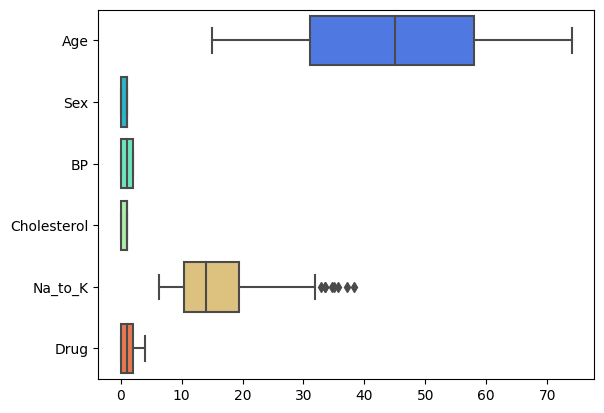

In [27]:
sns.boxplot(data=new_df,palette='rainbow',orient='h')

In [28]:
new_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#CORRELATION

In [29]:
CORR= new_df.corr()
CORR

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,0.116672
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,0.084186
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,0.284362
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.061895
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,-0.679433
Drug,0.116672,0.084186,0.284362,-0.061895,-0.679433,1.000000


In [30]:
CORR.style.background_gradient(cmap='seismic').set_precision(2)

<ipython-input-30-49226020b136>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  CORR.style.background_gradient(cmap='seismic').set_precision(2)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.00,0.10,-0.12,0.07,-0.06,0.12
Sex,0.10,1.00,-0.04,0.01,-0.13,0.08
BP,-0.12,-0.04,1.00,-0.03,0.04,0.28
Cholesterol,0.07,0.01,-0.03,1.00,-0.01,-0.06
Na_to_K,-0.06,-0.13,0.04,-0.01,1.00,-0.68
Drug,0.12,0.08,0.28,-0.06,-0.68,1.00


<Axes: >

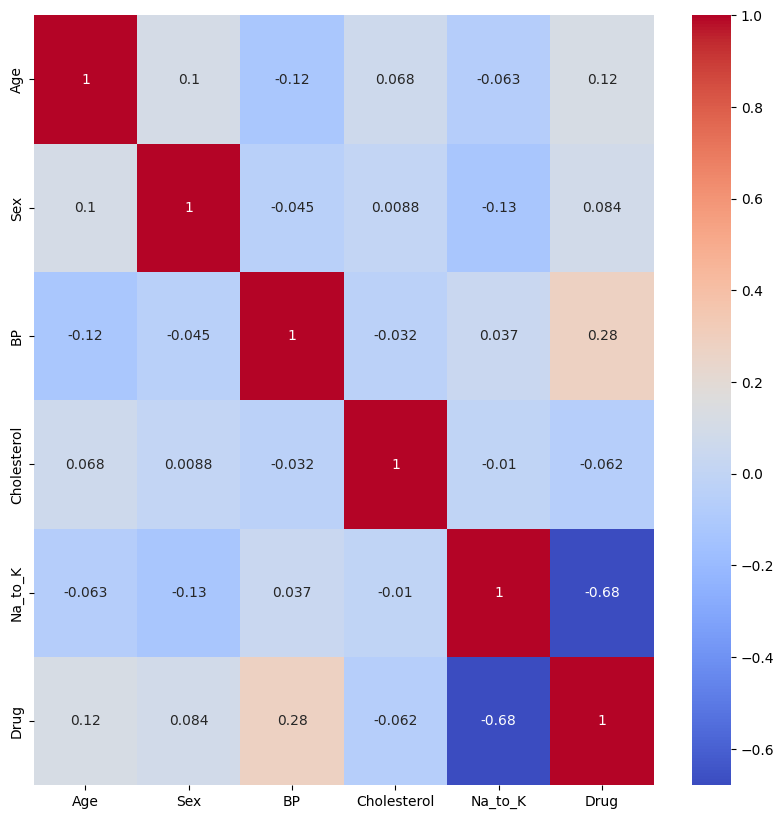

In [31]:
plt.figure( figsize=(10,10))
sns.heatmap(new_df.corr() , annot=True , cmap="coolwarm" )

#SPLIT DATA

In [32]:
x=new_df.drop(['Drug'],axis=1)
y=new_df['Drug' ]
print("How many Records and Features?\n",x.shape[0],"Records\n",x.shape[1],"Features")
# OR
# x=new_df.loc[:,new_df.columns != 'Drug_DrugY', 'Drug_drugA', 'Drug_drugB',
#        'Drug_drugC', 'Drug_drugX']
# y=new_df['Drug_DrugY', 'Drug_drugA', 'Drug_drugB',
#        'Drug_drugC', 'Drug_drugX']

How many Records and Features?
 200 Records
 5 Features


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3 ,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#DUPLICATE#

In [34]:
new_df.duplicated().sum()

0

#MODELS#

In [35]:
KNN_REG_mode=KNeighborsRegressor(n_neighbors=2)

#GRIDE_SEARCH#

In [36]:
params={
                "leaf_size": [1,30],
                'algorithm':['auto'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
}

In [37]:
grid_search=GridSearchCV(
    estimator=KNN_REG_mode.fit(x_train, y_train),
    param_grid=params
)

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
             param_grid={'algorithm': ['auto'], 'leaf_size': [1, 30],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'weights': ['uniform', 'distance']})

In [39]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'weights': 'distance'}

In [40]:
KNN_REG_mode=grid_search.best_estimator_

#OVERFITTING#

In [41]:
new_df=KNN_REG_mode.fit(x_test, y_test)
new_df=KNN_REG_mode.fit(x_valid, y_valid)
new_df=KNN_REG_mode.fit(x_train,y_train)

#PREDICTION#

In [42]:
y_pred_test_KNN_REG=KNN_REG_mode.predict(x_test)
y_pred_valid_KNN_REG=KNN_REG_mode.predict(x_valid)
y_pred_train_KNN_REG=KNN_REG_mode.predict(x_train)

#mean_absolute_error , mean_squared_error ,r2_score

In [43]:
MSE=mean_squared_error(y_pred_test_KNN_REG,y_test)
RMSE=np.sqrt(MSE)
MAS=mean_absolute_error(y_pred_test_KNN_REG,y_test)
score=r2_score(y_test,y_pred_test_KNN_REG)

In [44]:
score_test=r2_score(y_test,y_pred_test_KNN_REG)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_test))

Accuracy for our training dataset with tuning is : 65.49%


In [45]:
score_valid=r2_score(y_valid,y_pred_valid_KNN_REG)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_valid))

Accuracy for our training dataset with tuning is : 34.72%


In [46]:
score_train=r2_score(y_train,y_pred_train_KNN_REG)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train))

Accuracy for our training dataset with tuning is : 100.00%


Text(0.5, 1.0, 'R2 Score for TYPE OF MODEL')

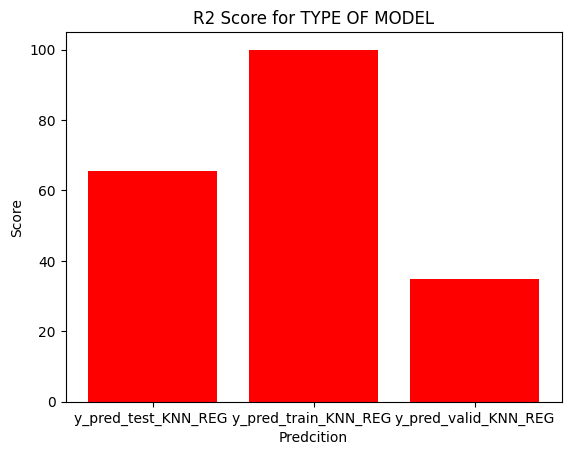

In [47]:
x= ["y_pred_test_KNN_REG ","y_pred_train_KNN_REG ","y_pred_valid_KNN_REG"]
y=[score_test ,score_train,score_valid]
plt.bar(x , y,color='RED')
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("R2 Score for TYPE OF MODEL")